In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel("Data_Train.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
c_d=data.copy()

In [10]:
c_d.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
c_d.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
def change_into_datetime(col):
    c_d[col]=pd.to_datetime(c_d[col])

In [13]:
c_d.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

/tmp/ipykernel_11915/3677723626.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  c_d[col]=pd.to_datetime(c_d[col])


In [15]:
c_d.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
c_d['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [17]:
c_d['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [18]:
c_d["journey_date"]=c_d["Date_of_Journey"].dt.day

In [19]:
c_d['journey_month']=c_d['Date_of_Journey'].dt.month

In [20]:
c_d['journey_year']=c_d['Date_of_Journey'].dt.year

In [21]:
c_d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-22 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-22 05:50:00,2023-05-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-22 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-05-22 18:05:00,2023-05-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-05-22 16:50:00,2023-05-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-05-22 19:55:00,2023-05-22 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-05-22 20:45:00,2023-05-22 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-05-22 08:20:00,2023-05-22 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-05-22 11:30:00,2023-05-22 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [22]:
c_d.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
c_d.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-22 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-22 05:50:00,2023-05-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-22 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-22 18:05:00,2023-05-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-22 16:50:00,2023-05-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [24]:
c_d['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
dict1={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [26]:
c_d['Total_Stops']=c_d['Total_Stops'].map(dict1)

In [27]:
c_d["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
c_d['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [29]:
c_d['Destination']=c_d['Destination'].replace("New Delhi","Delhi")

In [30]:
c_d["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
c_d

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year
0,IndiGo,Banglore,Delhi,BLR → DEL,2023-05-22 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-22 05:50:00,2023-05-22 13:15:00,7h 25m,2,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-22 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-22 18:05:00,2023-05-22 23:30:00,5h 25m,1,No info,6218,5,12,2019
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,2023-05-22 16:50:00,2023-05-22 21:35:00,4h 45m,1,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2023-05-22 19:55:00,2023-05-22 22:25:00,2h 30m,0,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2023-05-22 20:45:00,2023-05-22 23:20:00,2h 35m,0,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2023-05-22 08:20:00,2023-05-22 11:20:00,3h,0,No info,7229,27,4,2019
10681,Vistara,Banglore,Delhi,BLR → DEL,2023-05-22 11:30:00,2023-05-22 14:10:00,2h 40m,0,No info,12648,3,1,2019


In [32]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head()

In [33]:
extract_hour_min(c_d,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-22 13:15:00,7h 25m,2,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-22 23:30:00,5h 25m,1,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,2023-05-22 21:35:00,4h 45m,1,No info,13302,3,1,2019,16,50


In [34]:
extract_hour_min(c_d,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,16,50,21,35


In [35]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<AxesSubplot: >

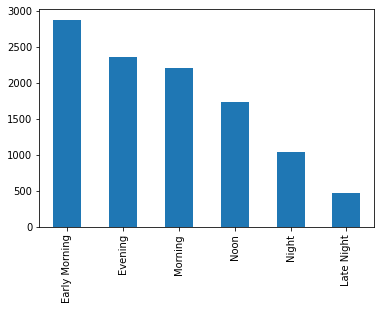

In [36]:
c_d['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [37]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [38]:
cf.go_offline()

In [39]:
c_d['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [40]:
def preprocess_duration(x):
    if 'h' not in x:
        x="0h "+x
    elif "m" not in x:
        x=x+' 0m'
    return x

In [41]:
c_d['Duration']=c_d['Duration'].apply(preprocess_duration)

In [42]:
c_d['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [43]:
c_d['Duration_hours']=c_d['Duration'].apply(lambda x:int(x.split(' ')[0][0::-1]))

In [44]:
c_d['Duration_minutes']=c_d['Duration'].apply(lambda x:int(x.split(' ')[1][0::-1]))

In [45]:
c_d.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,2,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,5,50,13,15,7,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,9,2019,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,18,5,23,30,5,2
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,16,50,21,35,4,4


In [46]:
c_d['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
c_d

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,2,5,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,5,50,13,15,7,2,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,9,2019,9,25,4,25,1,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,18,5,23,30,5,2,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,16,50,21,35,4,4,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,4,9,2019,19,55,22,25,2,3,150
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,2019,20,45,23,20,2,3,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,0,No info,7229,27,4,2019,8,20,11,20,3,0,180
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,0,No info,12648,3,1,2019,11,30,14,10,2,4,160


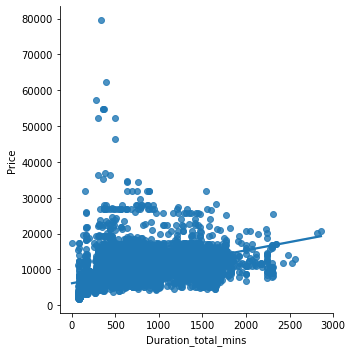

In [48]:
sns.lmplot(x='Duration_total_mins',y='Price',data=c_d)

<AxesSubplot: ylabel='Destination'>

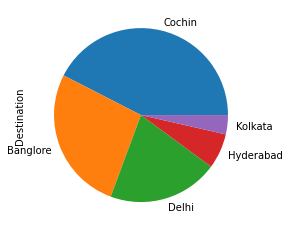

In [49]:
c_d['Destination'].value_counts().plot(kind='pie')

In [50]:
c_d['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [51]:
c_d[c_d['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

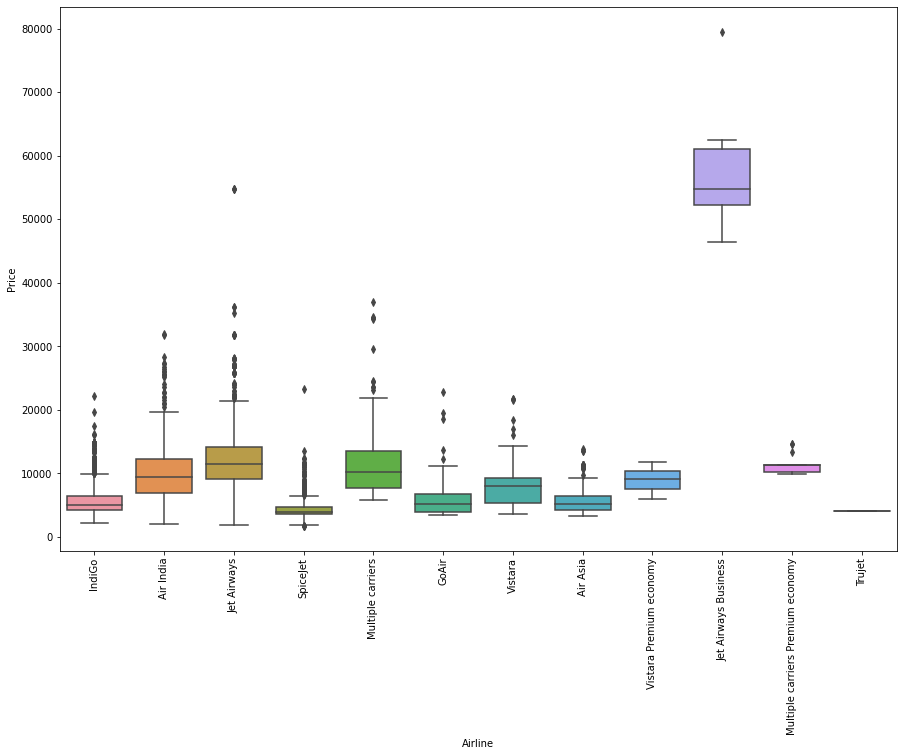

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Price',x='Airline',data=c_d)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

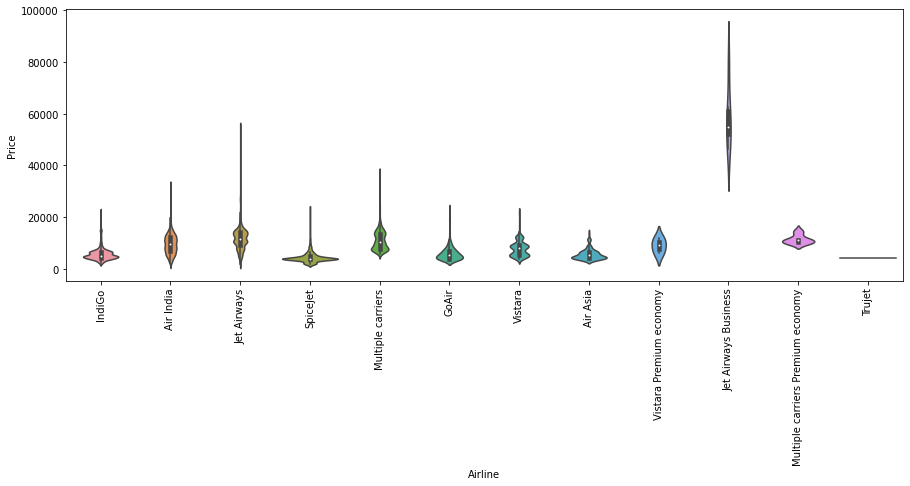

In [53]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=c_d)
plt.xticks(rotation='vertical')

In [54]:
np.round(c_d['Additional_Info'].value_counts()/len(c_d)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [55]:
c_d.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [56]:
c_d.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_date', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

In [57]:
c_d

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,5
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,1,5,50,13,15,7,2
2,Jet Airways,Delhi,Cochin,19h 0m,2,13882,6,9,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,5,12,18,5,23,30,5,2
4,IndiGo,Banglore,Delhi,4h 45m,1,13302,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,4,9,19,55,22,25,2,3
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,23,20,2,3
10680,Jet Airways,Banglore,Delhi,3h 0m,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,2h 40m,0,12648,3,1,11,30,14,10,2,4


In [58]:
cat_col=[col for col in c_d.columns if c_d[col].dtype=='object']

In [59]:
num_col=[col for col in c_d.columns if c_d[col].dtype!='object']

In [60]:
cat_col

['Airline', 'Source', 'Destination', 'Duration']

In [61]:
num_col

['Total_Stops',
 'Price',
 'journey_date',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [62]:
cd=c_d

In [63]:
cd['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [64]:
dict2={'Banglore':1,'Kolkata':2,'Delhi':3,'Chennai':4,'Mumbai':5}

In [65]:
cd['Source']=cd['Source'].map(dict2)

In [66]:
cd

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,1,Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,5
1,Air India,2,Banglore,7h 25m,2,7662,5,1,5,50,13,15,7,2
2,Jet Airways,3,Cochin,19h 0m,2,13882,6,9,9,25,4,25,1,0
3,IndiGo,2,Banglore,5h 25m,1,6218,5,12,18,5,23,30,5,2
4,IndiGo,1,Delhi,4h 45m,1,13302,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2,Banglore,2h 30m,0,4107,4,9,19,55,22,25,2,3
10679,Air India,2,Banglore,2h 35m,0,4145,27,4,20,45,23,20,2,3
10680,Jet Airways,1,Delhi,3h 0m,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,1,Delhi,2h 40m,0,12648,3,1,11,30,14,10,2,4


In [67]:
cd["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [68]:
dest={"Delhi":0,"Banglore":1,"Cochin":2,"Kolkata":3,"Hyderabad":4}

In [69]:
cd["Destination"]=cd['Destination'].map(dest)

In [70]:
cd

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,1,0,2h 50m,0,3897,24,3,22,20,1,10,2,5
1,Air India,2,1,7h 25m,2,7662,5,1,5,50,13,15,7,2
2,Jet Airways,3,2,19h 0m,2,13882,6,9,9,25,4,25,1,0
3,IndiGo,2,1,5h 25m,1,6218,5,12,18,5,23,30,5,2
4,IndiGo,1,0,4h 45m,1,13302,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2,1,2h 30m,0,4107,4,9,19,55,22,25,2,3
10679,Air India,2,1,2h 35m,0,4145,27,4,20,45,23,20,2,3
10680,Jet Airways,1,0,3h 0m,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,1,0,2h 40m,0,12648,3,1,11,30,14,10,2,4


In [71]:
air=cd['Airline'].unique()

In [72]:
air

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [73]:
dict3={key:index for index,key in enumerate(air,0)}

In [74]:
dict3

{'IndiGo': 0,
 'Air India': 1,
 'Jet Airways': 2,
 'SpiceJet': 3,
 'Multiple carriers': 4,
 'GoAir': 5,
 'Vistara': 6,
 'Air Asia': 7,
 'Vistara Premium economy': 8,
 'Jet Airways Business': 9,
 'Multiple carriers Premium economy': 10,
 'Trujet': 11}

In [75]:
cd['Airline']=cd['Airline'].map(dict3)

In [76]:
cd

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,1,0,2h 50m,0,3897,24,3,22,20,1,10,2,5
1,1,2,1,7h 25m,2,7662,5,1,5,50,13,15,7,2
2,2,3,2,19h 0m,2,13882,6,9,9,25,4,25,1,0
3,0,2,1,5h 25m,1,6218,5,12,18,5,23,30,5,2
4,0,1,0,4h 45m,1,13302,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,1,2h 30m,0,4107,4,9,19,55,22,25,2,3
10679,1,2,1,2h 35m,0,4145,27,4,20,45,23,20,2,3
10680,2,1,0,3h 0m,0,7229,27,4,8,20,11,20,3,0
10681,6,1,0,2h 40m,0,12648,3,1,11,30,14,10,2,4


In [77]:
cd.dtypes

Airline                 int64
Source                  int64
Destination             int64
Duration               object
Total_Stops             int64
Price                   int64
journey_date            int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_minutes        int64
dtype: object

In [78]:
cd.drop(columns=['Source','Duration'],inplace=True)

In [79]:
cd

,Airline,Destination,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,0,3897,24,3,22,20,1,10,2,5
1,1,1,2,7662,5,1,5,50,13,15,7,2
2,2,2,2,13882,6,9,9,25,4,25,1,0
3,0,1,1,6218,5,12,18,5,23,30,5,2
4,0,0,1,13302,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,1,0,4107,4,9,19,55,22,25,2,3
10679,1,1,0,4145,27,4,20,45,23,20,2,3
10680,2,0,0,7229,27,4,8,20,11,20,3,0
10681,6,0,0,12648,3,1,11,30,14,10,2,4


# Performing Outlier Detection

In [80]:
def plot(df,col):
    plt.figure(figsize=(15,10))
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

/tmp/ipykernel_11915/2020154333.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_11915/2020154333.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Figure size 1080x720 with 0 Axes>

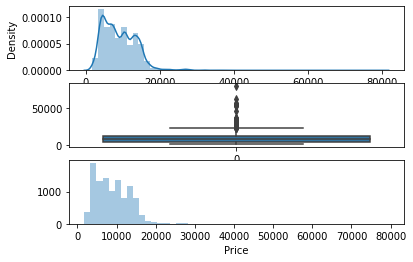

In [81]:
plot(cd,"Price")

In [82]:
cd['Price']=np.where(cd['Price']>=35000,cd['Price'].median(),cd['Price'])

/tmp/ipykernel_11915/2020154333.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_11915/2020154333.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Figure size 1080x720 with 0 Axes>

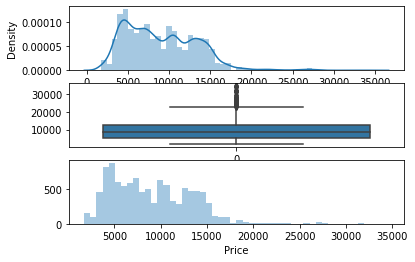

In [83]:
plot(cd,'Price')

In [84]:
cd

,Airline,Destination,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,0,3897.0,24,3,22,20,1,10,2,5
1,1,1,2,7662.0,5,1,5,50,13,15,7,2
2,2,2,2,13882.0,6,9,9,25,4,25,1,0
3,0,1,1,6218.0,5,12,18,5,23,30,5,2
4,0,0,1,13302.0,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,1,0,4107.0,4,9,19,55,22,25,2,3
10679,1,1,0,4145.0,27,4,20,45,23,20,2,3
10680,2,0,0,7229.0,27,4,8,20,11,20,3,0
10681,6,0,0,12648.0,3,1,11,30,14,10,2,4


In [85]:
cd.describe()

,Airline,Destination,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2.151563,1.486051,0.824190,9035.685639,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,2.803688,2.887193
std,1.784673,1.060232,0.675229,4355.992037,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,2.312156,1.625189
min,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,1.000000,2.000000
50%,2.000000,2.000000,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,2.000000,3.000000
75%,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,3.000000,4.000000
max,11.000000,4.000000,4.000000,34608.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000


In [86]:
from sklearn.feature_selection import mutual_info_regression

In [87]:
x=cd.drop(['Price'],axis=1)

In [88]:
y=cd['Price']

In [89]:
x.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_date           int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_minutes       int64
dtype: object

In [90]:
mutual_info_regression(x,y)

array([0.89159774, 0.79707286, 0.78453969, 0.19784624, 0.24482492,
       0.33041054, 0.25058222, 0.40144293, 0.35457419, 0.30591039,
       0.34493607])

In [91]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)

In [92]:
imp.columns=['importance']

In [93]:
imp.sort_values(by='importance',ascending=False)

,importance
Airline,0.885414
Destination,0.805519
Total_Stops,0.786716
Arrival_Time_hour,0.409675
Duration_minutes,0.354679
Arrival_Time_minute,0.347902
Dep_Time_hour,0.336190
Duration_hours,0.305342
Dep_Time_minute,0.251739
journey_month,0.240032


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model=RandomForestRegressor()

In [98]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
y_pre=model.predict(x_test)

In [100]:
y_pre

array([16671.42      ,  6329.89      ,  8875.22      , ...,
        6797.31      , 12278.63833333, 12924.2835    ])

In [101]:
from sklearn.metrics import mean_squared_error,mean_squared_error,r2_score,mean_absolute_error

In [102]:
print('r2_score: {}'.format(r2_score(y_test,y_pre)))
print('MSE : ', mean_squared_error(y_test,y_pre))
print('MAE : ', mean_absolute_error(y_test,y_pre))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pre)))

r2_score: 0.8141521603821246
MSE :  3742100.7459911904
MAE :  1208.6808119575662
RMSE :  1934.451019279421
